In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#from google.colab.patches import cv2_imshow

In [2]:
DATA_DIR = 'cropped_images'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [3]:
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['masked', 'non-masked']


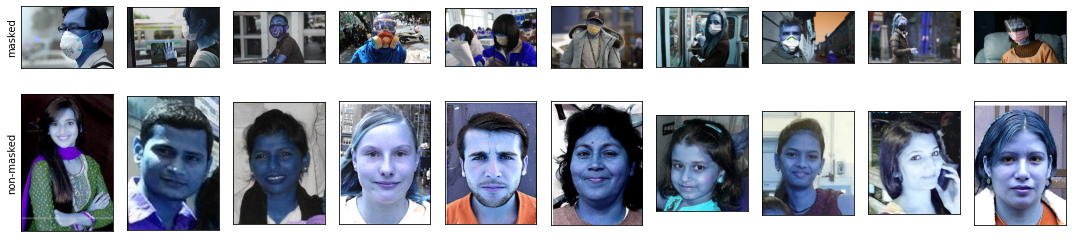

In [4]:


plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [5]:


training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(training_data))


100%|██████████| 300/300 [00:03<00:00, 89.37it/s] 

900


In [6]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(valid_data))

100%|██████████| 153/153 [00:03<00:00, 38.75it/s]

306


In [7]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(test_data))

100%|██████████| 50/50 [00:01<00:00, 46.67it/s]

100


In [8]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

train part

In [9]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (900, 227, 227, 3) Y_train= (900,)


validation part

In [10]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")


X_valid= (306, 227, 227, 3) Y_valid= (306,)


test part

In [11]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (100, 227, 227, 3) Y_test= (100,)


pickle out

In [12]:
pickle_out = open("pickles/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("pickles/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("pickles/X_valid.pickle","wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("pickles/Y_valid.pickle","wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open("pickles/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("pickles/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [13]:
np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [14]:


pickle_in = open("pickles/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("pickles/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("pickles/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("pickles/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("pickles/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("pickles/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")



X_train= (900, 227, 227, 3) Y_train= (900,)
X_valid= (306, 227, 227, 3) Y_valid= (306,)
X_test= (100, 227, 227, 3) Y_test= (100,)


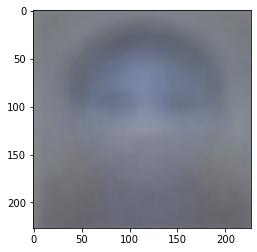

In [15]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [16]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

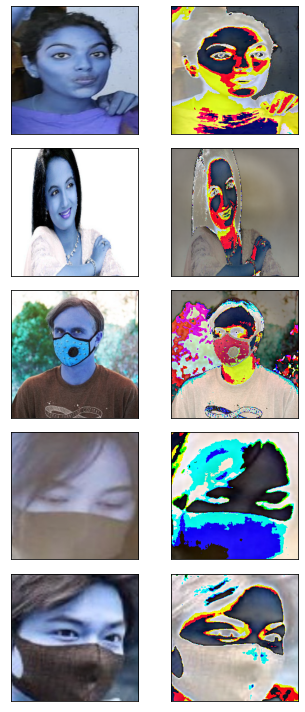

In [17]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [18]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [19]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [20]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/20
29/29 [==============================] - 48s 2s/step - loss: 1.3734 - accuracy: 0.7800 - val_loss: 54.7798 - val_accuracy: 0.5000
Epoch 2/20
29/29 [==============================] - 46s 2s/step - loss: 0.4372 - accuracy: 0.8744 - val_loss: 3.6300 - val_accuracy: 0.8170
Epoch 3/20
29/29 [==============================] - 45s 2s/step - loss: 0.4010 - accuracy: 0.8878 - val_loss: 3.1281 - val_accuracy: 0.7582
Epoch 4/20
29/29 [==============================] - 50s 2s/step - loss: 0.2929 - accuracy: 0.9022 - val_loss: 2.0989 - val_accuracy: 0.7974
Epoch 5/20
29/29 [==============================] - 48s 2s/step - loss: 0.2445 - accuracy: 0.9178 - val_loss: 0.7826 - val_accuracy: 0.8366
Epoch 6/20
29/29 [==============================] - 47s 2s/step - loss: 0.2809 - accuracy: 0.9100 - val_loss: 0.9188 - val_accuracy: 0.7908
Epoch 7/20
29/29 [==============================] - 46s 2s/step - loss: 0.2914 - accuracy: 0.9033 - val_loss: 0.6644 - val_accuracy: 0.7680
Epoch 8/20
29/29 [=

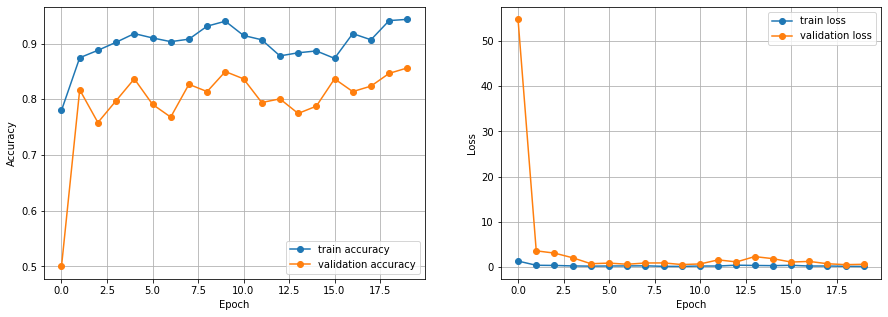

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

4/4 [==============================] - 1s 184ms/step - loss: 0.5968 - accuracy: 0.8600

Test Accuracy: 0.8600000143051147

Test Loss: 0.5967798233032227


In [25]:
model.save("MyModel_V4")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MyModel_V4\assets
